In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo2.4.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo2.4.jpg


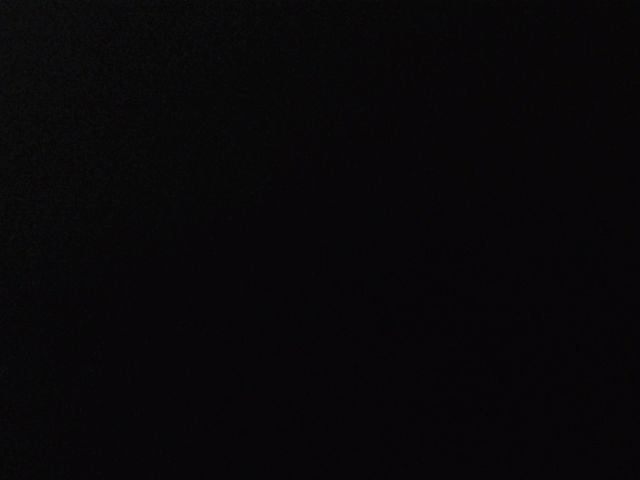

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import matplotlib.pyplot as plt
stereo = plt.imread('/content/photo2.jpg')
stereo.shape

(480, 640, 3)

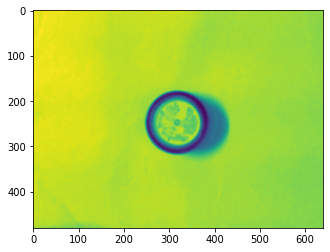

In [ ]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
pic = plt.imread('/content/photo.jpg')
pic2 = rgb2gray(pic)
plt.imshow(pic2)

In [ ]:
from scipy import ndimage
from skimage.transform import resize
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np
kernal_h = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernal_v = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
out_1 = ndimage.convolve(pic2, kernal_h, mode = 'reflect')
out_2 = ndimage.convolve(pic2, kernal_v, mode = 'reflect')
out = np.sqrt(np.square(out_1)+np.square(out_2))
plt.imsave('/content/opic.jpeg',out)
out2 = plt.imread('/content/opic.jpeg')
out2.shape# = out.reshape((480,640,3))
#plt.imshow(out2)

(480, 640, 3)

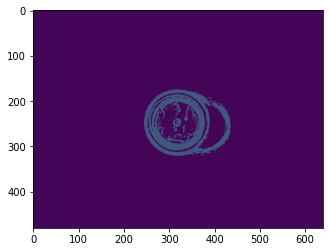

In [ ]:
image = out2
image2 = image.reshape(image.shape[0]*image.shape[1],image.shape[2])
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state=0).fit(image2)
res = kmeans.cluster_centers_[kmeans.labels_]
res = res.reshape(image.shape[0],image.shape[1],image.shape[2])
plt.imshow(res/255)
res = rgb2gray(res)

In [ ]:
if any([res[176][j]>=80 for j in range(len(res[176]))]):
    print('y')

y


In [ ]:
c = []
f = False
for i in range(len(res)):
  if any([res[i][j]>=80 for j in range(len(res[i]))]):
    if len(c)==0:
      c.append((i,j))
    f=True
  elif f:
    c.append((i,j))
    break
print(c)

[(175, 311), (321, 311)]


In [ ]:
c[1][0]-c[0][0]

146

In [ ]:
import numpy as np
import imutils
import cv2
def find_marker(image):
	# convert the image to grayscale, blur it, and detect edges
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	gray = cv2.GaussianBlur(gray, (5, 5), 0)
	edged = cv2.Canny(gray, 35, 125)
	# find the contours in the edged image and keep the largest one;
	# we'll assume that this is our piece of paper in the image
	cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key = cv2.contourArea)
	# compute the bounding box of the of the paper region and return it
	return cnts

In [ ]:
def distance_to_camera(knownWidth, focalLength, perWidth):
	# compute and return the distance from the maker to the camera
	return (knownWidth * focalLength) / perWidth

In [ ]:
# initialize the known distance from the camera to the object, which
# in this case is 24 inches
KNOWN_DISTANCE = 16.4
# initialize the known object width, which in this case, the piece of
# paper is 12 inches wide
KNOWN_WIDTH = 3.8
# load the furst image that contains an object that is KNOWN TO BE 2 feet
# from our camera, then find the paper marker in the image, and initialize
# the focal length
image = cv2.imread("/content/photo.jpg")
marker = find_marker(image)
focalLength = (marker[1][0] * KNOWN_DISTANCE) / KNOWN_WIDTH

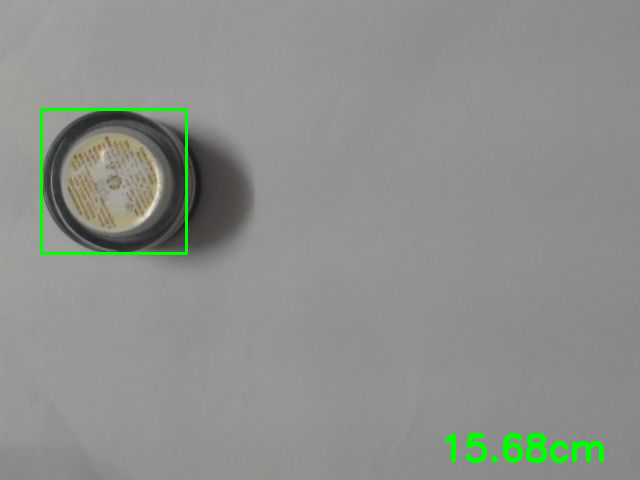

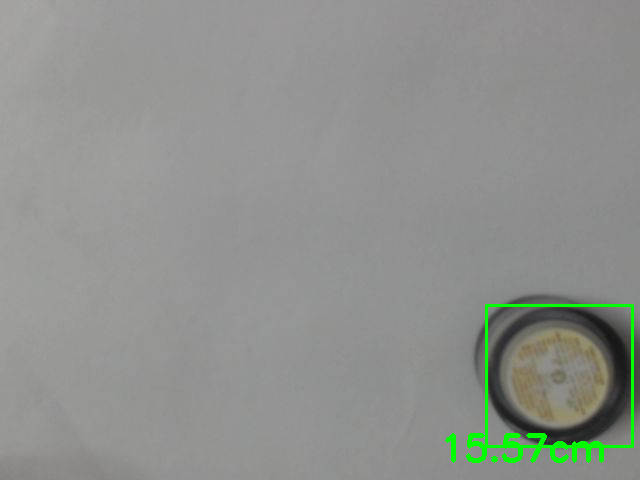

In [ ]:
# loop over the images
from google.colab.patches import cv2_imshow
import os
paths='/content/images/'
for imagePath in sorted(os.listdir(paths)): 
	# load the image, find the marker in the image, then compute the
	# distance to the marker from the camera
	image = cv2.imread(paths+imagePath)
	marker = find_marker(image)
	inches = distance_to_camera(KNOWN_WIDTH, focalLength, marker[1][0])
	# draw a bounding box around the image and display it
	box = cv2.cv.BoxPoints(marker) if imutils.is_cv2() else cv2.boxPoints(marker)
	box = np.int0(box)
	cv2.drawContours(image, [box], -1, (0, 255, 0), 2)
	cv2.putText(image, "%.2fcm" % ((inches)),
		(image.shape[1] - 200, image.shape[0] - 20), cv2.FONT_HERSHEY_SIMPLEX,
		1.2, (0, 255, 0), 3)
	cv2_imshow(image)
	cv2.waitKey(0)

In [ ]:
 import os
paths='/content/images/'
for imagePath in sorted(os.listdir(paths)):
  print(paths+imagePath)

/content/images/photo1.jpg
/content/images/photo2.jpg


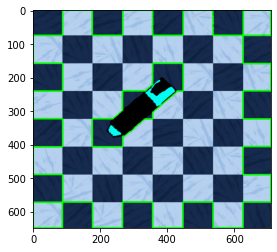

In [ ]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
image = cv2.imread('/content/Screen Shot 2020-04-19 at 8.24.03 PM.png') 
#converting RGB image to Binary 
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
ret,thresh = cv2.threshold(gray_image,127,255,0) 
#calculate the contours from binary image
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
b_contours = []
for i in contours:
  if cv2.contourArea(i)>20000:
    b_contours.append(i)
b_contours = np.array(b_contours)
with_contours = cv2.drawContours(image,b_contours,-1,(0,255,0),3) 
plt.imshow(with_contours)

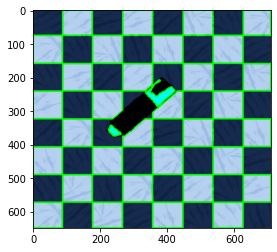

In [ ]:
with_cs = cv2.drawContours(image,b_contours[18],-1,(0,255,0),3) 
plt.imshow(with_cs)

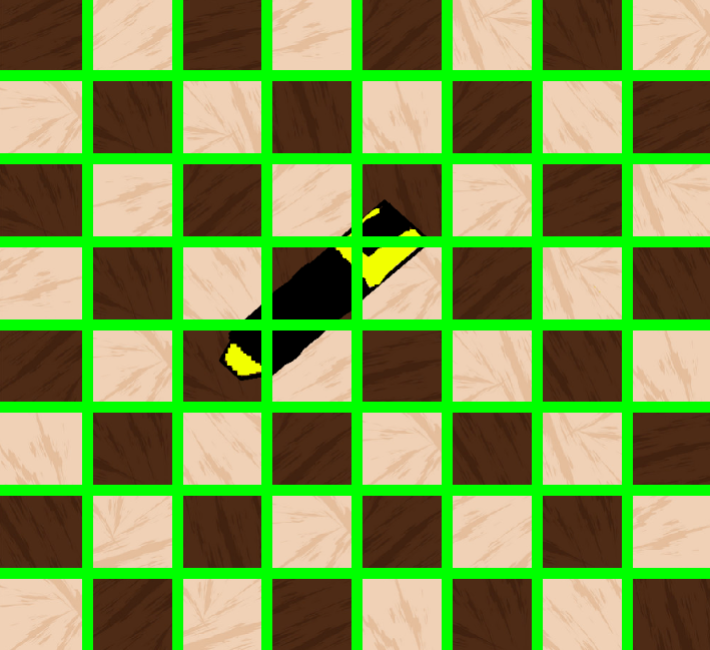

In [ ]:
img = cv2.imread('/content/Screen Shot 2020-04-19 at 8.24.03 PM.png')
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import imutils

im = img
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 60, 150, apertureSize=3)

img = im.copy()
lines = cv2.HoughLines(edges,1,np.pi/180,200)

for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 3000*(-b))
        y1 = int(y0 + 3000*(a))
        x2 = int(x0 - 3000*(-b))
        y2 = int(y0 - 3000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),10)

cv2_imshow(imutils.resize(img, height=650))